# PID制御による定常偏差の打ち消し

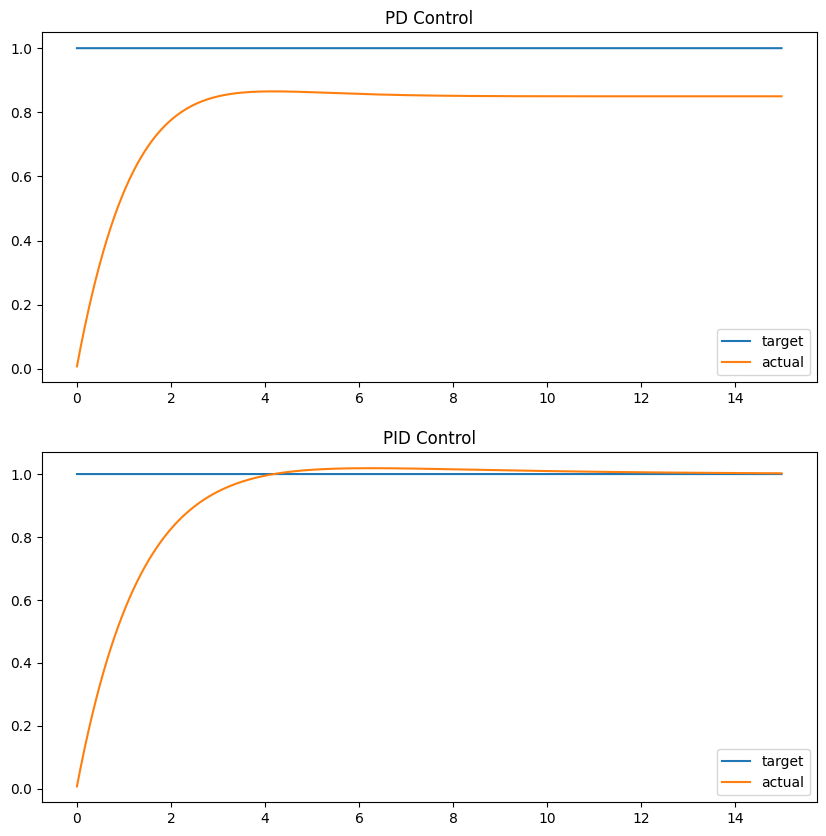

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 制御定数
Kp = 1 # 比例ゲイン
Kd = 1 # 微分ゲイン
Ki = 0.15 # 積分ゲイン

dt = 10e-3 # 制御周期(100Hz = 10ms)
t = np.arange(0, 15, dt)
target = np.full_like(t, 1) # 目標値

actual = np.zeros_like(t) # 制御量(変位)
velocity = np.zeros_like(t) # 速度
output = np.zeros_like(t) # 操作量
error = np.zeros_like(t) # 偏差

actual_pid = np.zeros_like(t) # 制御量(変位)
velocity_pid = np.zeros_like(t) # 速度
output_pid = np.zeros_like(t) # 操作量
error_pid = np.zeros_like(t) # 偏差
integral_pid = np.zeros_like(t) # I項

for i in range(len(t)):
  error[i] = target[i] - actual[i-1]
  output[i] = error[i] * Kp + (error[i] - error[i-1]) * Kd / dt
  output[i] -= 0.15 # 重力の影響
  velocity[i] = velocity[i-1] + (output[i] - velocity[i-1]) / 128
  actual[i] = actual[i-1] + velocity[i] * dt


for i in range(len(t)):
  error_pid[i] = target[i] - actual_pid[i-1]
  integral_pid[i] = integral_pid[i-1] + error_pid[i] * dt
  output_pid[i] = error_pid[i] * Kp + integral_pid[i] * Ki + (error_pid[i] - error_pid[i-1]) * Kd / dt
  output_pid[i] -= 0.15 # 重力の影響
  velocity_pid[i] = velocity_pid[i-1] + (output_pid[i] - velocity_pid[i-1]) / 128
  actual_pid[i] = actual_pid[i-1] + velocity_pid[i] * dt

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

pd_axis = axes[0]
pid_axis = axes[1]

pd_axis.set_title('PD Control')
pd_axis.plot(t, target, label='target')
pd_axis.plot(t, actual, label='actual')
pd_axis.legend()

pid_axis.set_title('PID Control')
pid_axis.plot(t, target, label='target')
pid_axis.plot(t, actual_pid, label='actual')
pid_axis.legend()

plt.show()